In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [27]:
def divide_to_xy_train(train,test):
    x_train = train.iloc[:,:-1]
    #print(x_train)
    x_test = test.iloc[:,:-1]
    y_train = train.iloc[:,-1]
    y_test = test.iloc[:,-1]
    #print(y_train)
    return x_train,y_train,x_test,y_test

In [28]:
def scale_data(x):
    num_col_names=["duration","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerro_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate"]
    scaler = MinMaxScaler()
    x[num_col_names]=x[num_col_names].astype(float)
    #print(x_train)
    x[num_col_names]=scaler.fit_transform(x[num_col_names])
    #print(x_train)
    return x

In [40]:
def get_value_code(x_train):
    cat=['IRC', 'X11', 'Z39_50', 'aol', 'auth', 'bgp', 'courier', 'csnet_ns', 'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher', 'harvest', 'hostnames', 'http', 'http_2784', 'http_443', 'http_8001', 'imap4', 'iso_tsap', 'klogin', 'kshell', 'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm', 'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u', 'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private', 'red_i', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh', 'sunrpc', 'supdup', 'systat', 'telnet', 'tftp_u', 'tim_i', 'time', 'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois']
    col=x_train['service']
    cat_list=set(col)
    cat = set(cat)
    final=list(cat.union(cat_list))
    print(len(final))
    return final

In [29]:
#read train data from file into pandas:
def read_data():
    col_names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerro_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","class",42]
    data = pd.read_csv('KDDTrain2.csv',names=col_names,index_col=False)
    test = pd.read_csv('KDDTest2.csv',names=col_names,index_col=False) 
    return data,test

In [30]:
def one_hot_encode_train(x_train,cat):
    x_train=pd.concat([x_train,pd.get_dummies(x_train['protocol_type'])],axis=1)
    x_train.drop(['protocol_type'],axis=1,inplace=True)
    print(x_train.columns.values)
    xt2 = list(x_train['service'])
    t2 = pd.Series(xt2)
    t2 = t2.astype('category',categories=cat)
    dt2 = pd.get_dummies(t2)
    x_train = pd.concat([x_train,dt2],axis=1)
    x_train.drop(['service'],axis=1,inplace=True)
    x_train = pd.concat([x_train,pd.get_dummies(x_train['flag'])],axis=1)
    x_train.drop(['flag'],axis=1,inplace=True)
    print(x_train)
    #print(x_train.shape)
    return x_train

In [31]:
def one_hot_encode_test(x_test,cat):
    t1 = pd.get_dummies(x_test['protocol_type'])
    x_test = pd.concat([x_test,t1],axis=1)
    x_test.drop(['protocol_type'],axis=1,inplace=True)
    #print(x_test)
    print("length",len(cat))
    xt2 = list(x_test['service'])
   # print(xt2)
    t2 = pd.Series(xt2)
    t2 = t2.astype('category',categories=cat)
    dt2 = pd.get_dummies(t2)
    x_test = pd.concat([x_test,dt2],axis=1)
    x_test.drop(['service'],axis=1,inplace=True)
    #print(x_test.shape)
    #xt3 = x_test.iloc[:,3]
    #print(xt3)
    t3= pd.get_dummies(x_test['flag'])
    x_test = pd.concat([x_test,t3],axis=1)
    x_test.drop(['flag'],axis=1,inplace=True)
    #print(x_test.shape)
    return x_test
    
#t2 = t2.T.reindex(cat).T.fillna(int(0))
#print(t2.http)

In [32]:
def select_features(x_train,y_train):
    selected = SelectPercentile(percentile=50)
    selected.fit(x_train,y_train)
    header=x_train.columns.values.tolist()
    x_train_selected=selected.transform(x_train)
    #print('X train shape:',x_train.shape)
    #print('x train selected shape',x_train_selected.shape)
    mask = selected.get_support()
    #print(mask)
    #print(mask.shape)
    plt.matshow(mask.reshape(1,-1),cmap="gray_r")
    dictionary = dict(zip(header,mask))
    #print(dictionary)
    for cat in dictionary:
        if dictionary[cat]==False:
            x_train=x_train.drop([cat],axis=1)
    return dictionary,x_train,y_train

In [33]:
def select_features_by_model(x_train,y_train):
    select = SelectFromModel(DecisionTreeClassifier(),threshold="median")
    select.fit(x_train,y_train)
    select_m=select.transform(x_train)
    header=x_train.columns.values.tolist()
    print(header)
    print('Selected from model',select_m.shape)
    mask2 = select.get_support()
    #print(len(mask2))
    plt.matshow(mask2.reshape(1,-1),cmap="gray_r")
    dictionary = dict(zip(header,mask2))
    #print(dictionary)
    for cat in dictionary:
        if dictionary[cat]==False:
            x_train=x_train.drop([cat],axis=1)
    print(x_train.shape)
    return dictionary,x_train,y_train

In [34]:
def prep_test_data(x_test,dictionary):
    for cat in dictionary:
        if dictionary[cat]==False:
            x_test=x_test.drop([cat],axis=1)
    return x_test

In [35]:
def build_model(x_train,y_train):
    model = tree.DecisionTreeClassifier()
    model = model.fit(x_train,y_train)
    return model

In [36]:
def test_model(model,x_test):
    y_predict=model.predict(x_test)
    #print(y_predict)
    return y_predict

In [37]:
def acc(y_test,y_predict):
    target_names=['normal','r2l','probe','dos','u2r']
    
    print(accuracy_score(y_test,y_predict))
    print(classification_report(y_test,y_predict,target_names=target_names))
    print(confusion_matrix(y_test,y_predict))

71
['duration' 'service' 'flag' 'src_bytes' 'dst_bytes' 'land'
 'wrong_fragment' 'urgent' 'hot' 'num_failed_logins' 'logged_in'
 'num_compromised' 'root_shell' 'su_attempted' 'num_root'
 'num_file_creations' 'num_shells' 'num_access_files' 'num_outbound_cmds'
 'is_host_login' 'is_guest_login' 'count' 'srv_count' 'serror_rate'
 'srv_serror_rate' 'rerro_rate' 'srv_rerror_rate' 'same_srv_rate'
 'diff_srv_rate' 'srv_diff_host_rate' 'dst_host_count'
 'dst_host_srv_count' 'dst_host_same_srv_rate' 'dst_host_diff_srv_rate'
 'dst_host_same_src_port_rate' 'dst_host_srv_diff_host_rate'
 'dst_host_serror_rate' 'dst_host_srv_serror_rate' 'dst_host_rerror_rate'
 'dst_host_srv_rerror_rate' 'icmp' 'tcp' 'udp']


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  import sys


        duration     src_bytes     dst_bytes  land  wrong_fragment  urgent  \
0       0.000000  3.558064e-07  0.000000e+00   0.0             0.0     0.0   
1       0.000000  1.057999e-07  0.000000e+00   0.0             0.0     0.0   
2       0.000000  0.000000e+00  0.000000e+00   0.0             0.0     0.0   
3       0.000000  1.681203e-07  6.223962e-06   0.0             0.0     0.0   
4       0.000000  1.442067e-07  3.206260e-07   0.0             0.0     0.0   
5       0.000000  0.000000e+00  0.000000e+00   0.0             0.0     0.0   
6       0.000000  0.000000e+00  0.000000e+00   0.0             0.0     0.0   
7       0.000000  0.000000e+00  0.000000e+00   0.0             0.0     0.0   
8       0.000000  0.000000e+00  0.000000e+00   0.0             0.0     0.0   
9       0.000000  0.000000e+00  0.000000e+00   0.0             0.0     0.0   
10      0.000000  0.000000e+00  0.000000e+00   0.0             0.0     0.0   
11      0.000000  0.000000e+00  0.000000e+00   0.0             0

/home/manisha/.local/lib/python3.5/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [16 47] are constant.
  UserWarning)
/home/manisha/.local/lib/python3.5/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


length 71


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  # Remove the CWD from sys.path while we load stuff.


0.790764726756565
              precision    recall  f1-score   support

      normal       0.96      0.85      0.90      7460
         r2l       0.72      0.93      0.81      9711
       probe       0.64      0.67      0.65      2421
         dos       0.92      0.28      0.43      2885
         u2r       0.48      0.31      0.38        67

   micro avg       0.79      0.79      0.79     22544
   macro avg       0.75      0.61      0.64     22544
weighted avg       0.82      0.79      0.78     22544

[[6346 1018   96    0    0]
 [  71 9044  584    8    4]
 [ 170  585 1617   49    0]
 [   0 1841  226  799   19]
 [   0   37    0    9   21]]


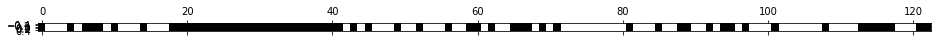

In [45]:
def main():
    data,test=read_data()
    data=data.drop([42],axis=1)
    test=test.drop([42],axis=1)
    x_train,y_train,x_test,y_test=divide_to_xy_train(data,test)
    x_train=scale_data(x_train)
    x_test=scale_data(x_test)
    cat=get_value_code(x_train)
    x_train=one_hot_encode_train(x_train,cat)
    dictionary,x_train,y_train=select_features(x_train,y_train)
    #print(x_train.shape)
    x_test = one_hot_encode_test(x_test,cat)
    x_test_h = x_test.columns.values.tolist()
    x_test = prep_test_data(x_test,dictionary)
    """dictionary2,x_train,y_train=select_features_by_model(x_train,y_train)
    x_test = prep_test_data(x_test,dictionary2)"""
    #print("shape ",x_test.shape,x_train.shape)
    model = build_model(x_train,y_train)
    y_predict=test_model(model,x_test)
    #print(y_test)
    acc(y_test,y_predict)
main()